In [69]:
!pip install pandas --quiet

In [70]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [71]:
house_df = pd.read_csv('/Users/joannamao/Desktop/Project1/house/data.csv')

In [72]:
house_df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [73]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [74]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [75]:
house_df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [76]:
house_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [77]:
house_df[house_df.isnull().any(axis=1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [78]:
corr = house_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


<AxesSubplot:>

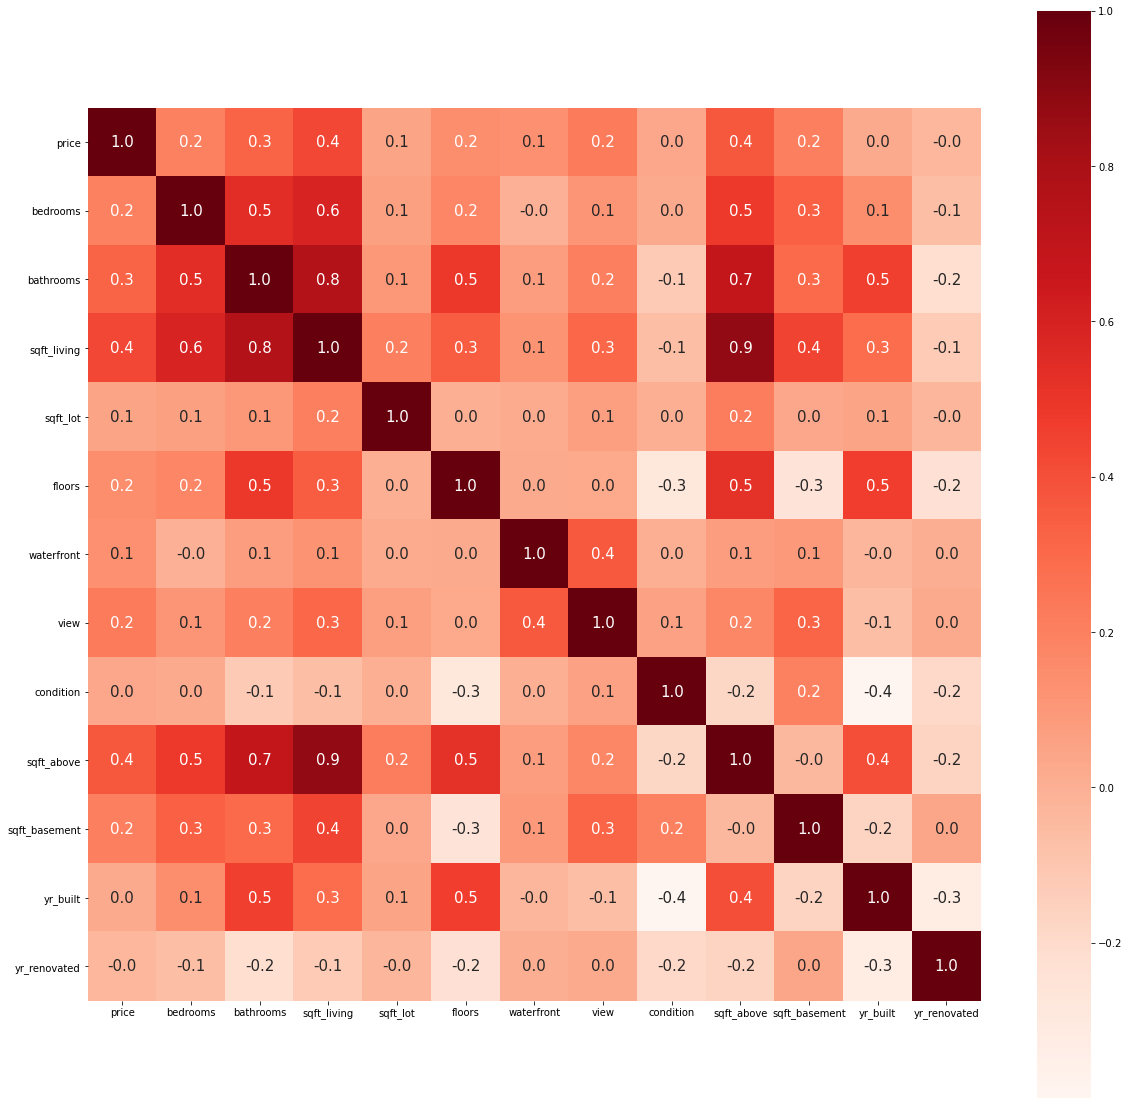

In [79]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

In [80]:
house_df['date']=pd.to_datetime(house_df['date'])

In [81]:
house_df['date']

0      2014-05-02
1      2014-05-02
2      2014-05-02
3      2014-05-02
4      2014-05-02
          ...    
4595   2014-07-09
4596   2014-07-09
4597   2014-07-09
4598   2014-07-10
4599   2014-07-10
Name: date, Length: 4600, dtype: datetime64[ns]

In [82]:
house_df['bedrooms'] = house_df['bedrooms'].astype(int)
house_df['bathrooms'] = house_df['bathrooms'].astype(int)
house_df['floors'] = house_df['floors'].astype(int)

In [83]:
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


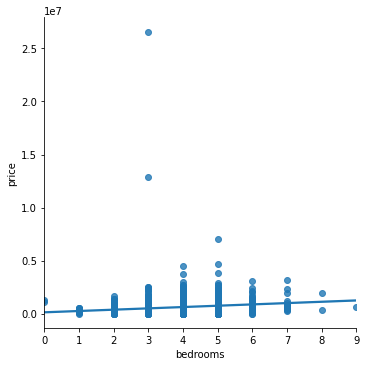

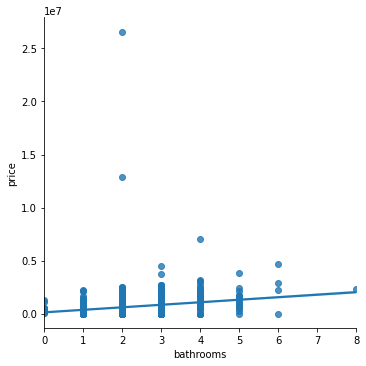

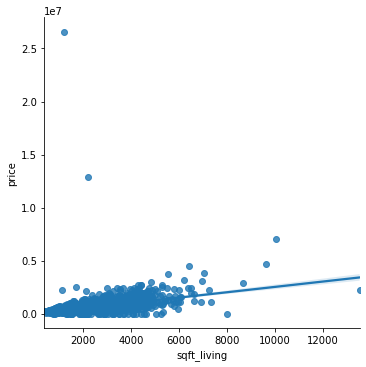

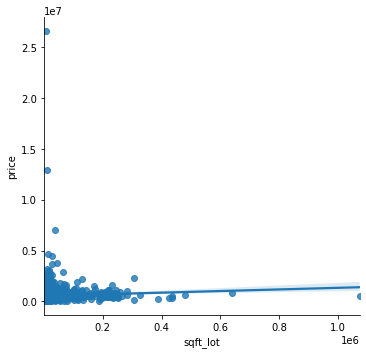

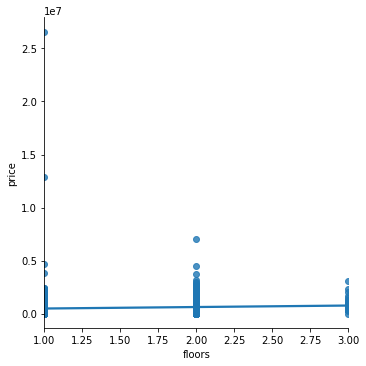

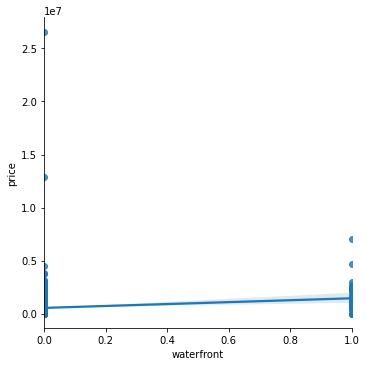

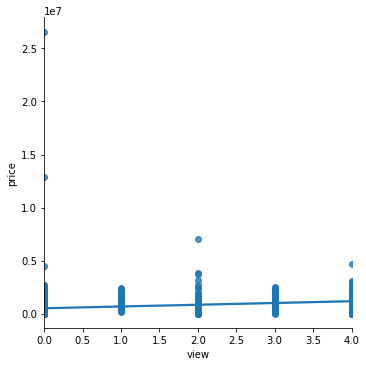

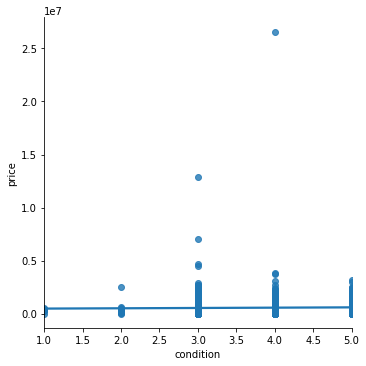

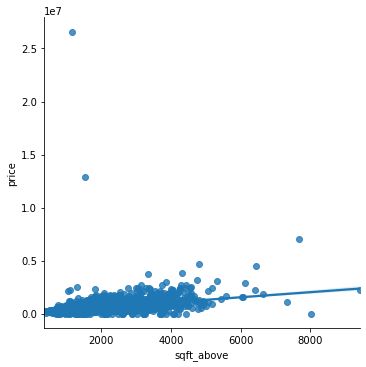

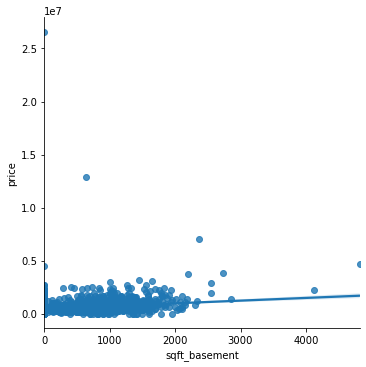

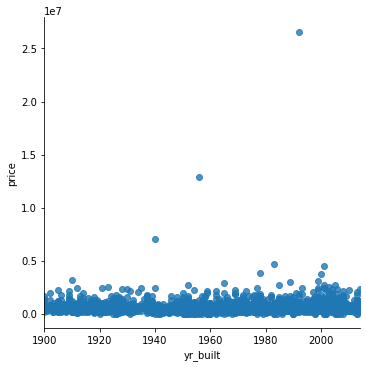

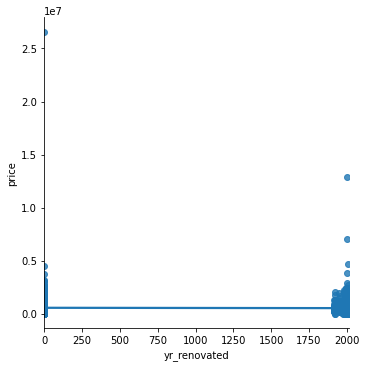

In [84]:
for i in house_df.columns:
    if ( house_df[i].dtype ==  np.int64 ) | ( house_df[i].dtype ==  np.int32):
        sns.lmplot(x = i, y ='price', data = house_df)

In [86]:
house_df['date'].dt.year.unique(), house_df['date'].dt.month.unique()

(array([2014]), array([5, 6, 7]))

In [88]:
house_df['month']=  house_df['date'].dt.month
house_df.month.value_counts()

6    2179
5    1768
7     653
Name: month, dtype: int64

In [89]:
house_df.drop(['date'], axis= 1, inplace= True)

In [56]:
house_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5
1,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,5
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5


In [90]:
house_df['country'].unique()

array(['USA'], dtype=object)

In [91]:
house_df['street'].unique()

array(['18810 Densmore Ave N', '709 W Blaine St',
       '26206-26214 143rd Ave SE', ..., '759 Ilwaco Pl NE',
       '5148 S Creston St', '18717 SE 258th St'], dtype=object)

In [92]:
house_df['statezip'].unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [93]:
house_df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Medina                   11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [94]:
house_df.drop(['statezip','street','country'],axis=1,inplace=True)

In [95]:
house_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,month
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,5
1,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,5
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,5
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,5
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,5


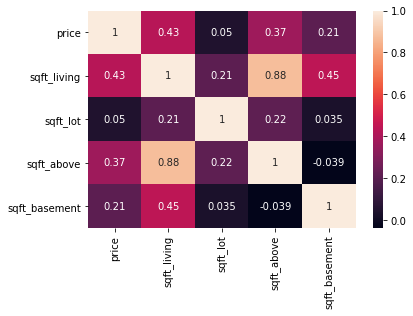

In [96]:
sns.heatmap(house_df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]].corr(), annot=True);

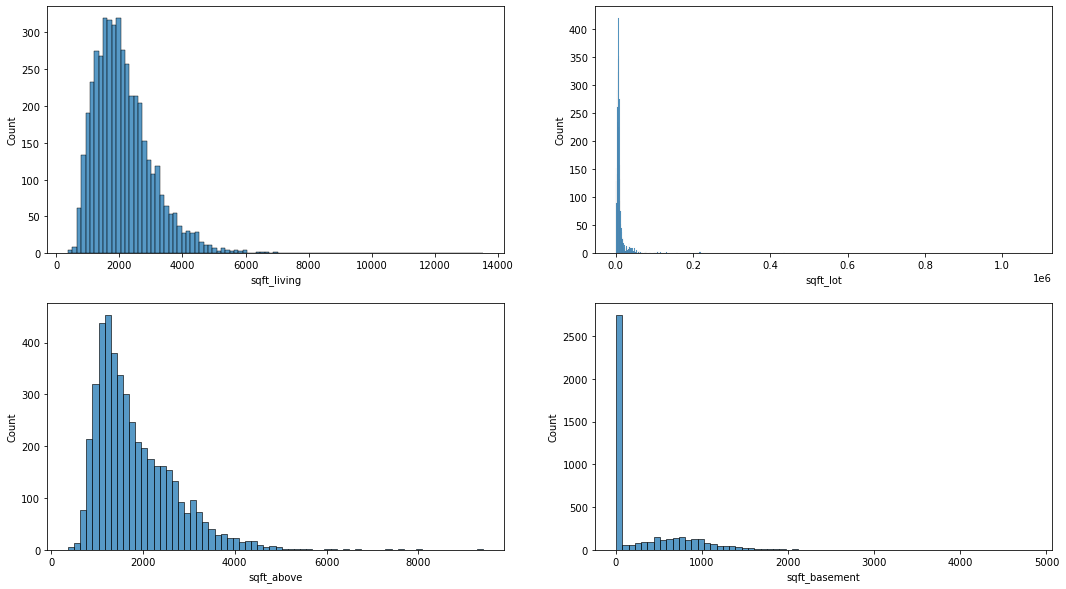

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], x= 'sqft_living', data= house_df);
sns.histplot(ax=axes[0, 1], x= 'sqft_lot', data= house_df);
sns.histplot(ax=axes[1, 0], x= 'sqft_above', data= house_df);
sns.histplot(ax=axes[1, 1], x= 'sqft_basement', data= house_df);

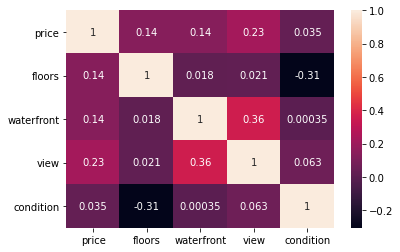

In [98]:
sns.heatmap(house_df[["price", "floors", "waterfront", "view", "condition"]].corr(), annot=True);

<AxesSubplot:>

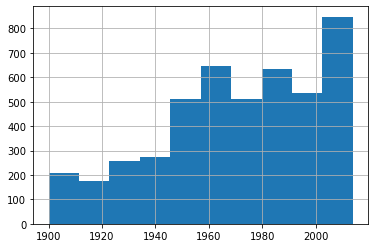

In [99]:
house_df['yr_built'].hist()

<AxesSubplot:>

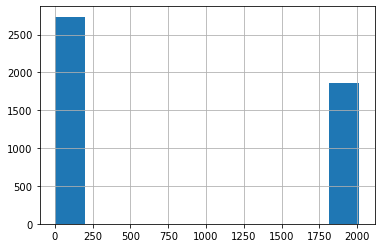

In [100]:
house_df['yr_renovated'].hist()

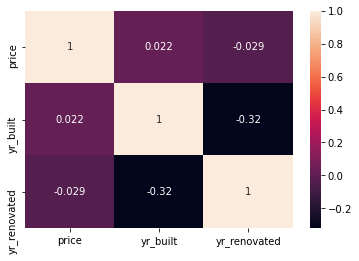

In [101]:
sns.heatmap(house_df[["price", "yr_built", "yr_renovated"]].corr(), annot=True);

In [102]:
house_df['price'].describe().T

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

<AxesSubplot:>

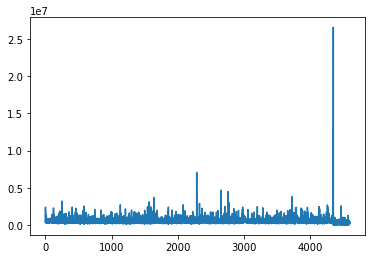

In [103]:
house_df.price.plot()

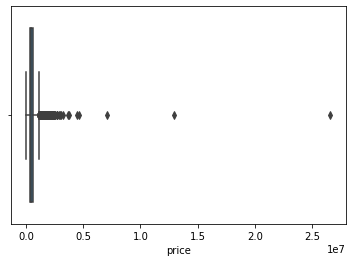

In [104]:
sns.boxplot(x='price', data= house_df);

In [105]:
df=house_df
df= pd.get_dummies(df, drop_first=True)
df.head().T

,0,1,2,3,4
price,313000.0,2384000.0,342000.0,420000.0,550000.0
bedrooms,3.0,5.0,3.0,3.0,4.0
bathrooms,1.0,2.0,2.0,2.0,2.0
sqft_living,1340.0,3650.0,1930.0,2000.0,1940.0
sqft_lot,7912.0,9050.0,11947.0,8030.0,10500.0
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0.0,0.0,0.0,0.0,0.0
view,0.0,4.0,0.0,0.0,0.0
condition,3.0,5.0,4.0,4.0,4.0
sqft_above,1340.0,3370.0,1930.0,1000.0,1140.0


In [107]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [110]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [113]:
X_train.mean(), X_train.std()

(bedrooms                        3.390761
 bathrooms                       1.787772
 sqft_living                  2136.399457
 sqft_lot                    14579.103261
 floors                          1.458696
 waterfront                      0.007337
 view                            0.236685
 condition                       3.453804
 sqft_above                   1820.710326
 sqft_basement                 315.689130
 yr_built                     1970.348641
 yr_renovated                  804.924185
 month                           5.764674
 city_Auburn                     0.036957
 city_Beaux Arts Village         0.000272
 city_Bellevue                   0.060870
 city_Black Diamond              0.002174
 city_Bothell                    0.005978
 city_Burien                     0.016576
 city_Carnation                  0.004348
 city_Clyde Hill                 0.002174
 city_Covington                  0.008696
 city_Des Moines                 0.011413
 city_Duvall                     0

In [114]:
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns=X_train.columns)
X_text=pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lm = LinearRegression()

In [117]:
lm.fit(X_train, y_train)

LinearRegression()

In [118]:
lm.intercept_

544847.497498272

In [119]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T

In [120]:
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})

In [121]:
coeffcients

,Attribute,Coefficients
0,bedrooms,-38814.279477
1,bathrooms,13644.322482
2,sqft_living,40052879647340360.0
3,sqft_lot,-1184.083851
4,floors,12488.66382
5,waterfront,41518.877024
6,view,36942.215908
7,condition,20511.938241
8,sqft_above,-35889468072964648.0
9,sqft_basement,-19409685936586184.0


In [122]:
y_pred = lm.predict(X_train)

In [123]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6565266679286031
Adjusted R^2: 0.6512176680401134
MAE: 126106.53279112554
MSE: 48802715821.88322
RMSE: 220913.3672322325


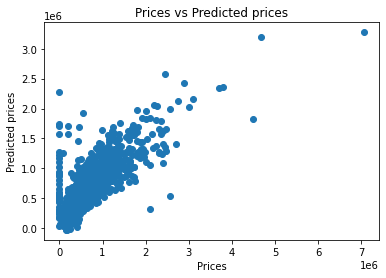

In [124]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

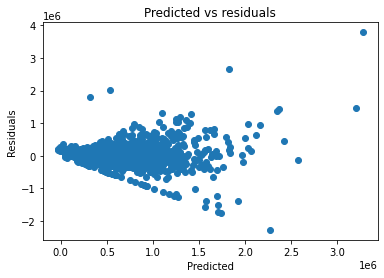

In [125]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

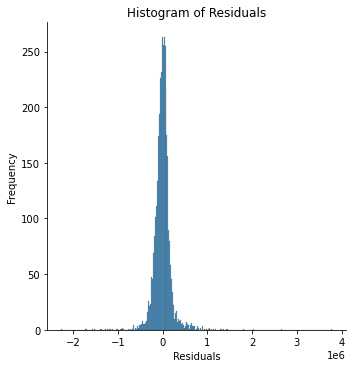

In [126]:
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [127]:
y_test_pred = lm.predict(X_test)

In [128]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -2.892834911870695e+26
Adjusted R^2: -3.080550734657206e+26
MAE: 1.386094533524918e+19
MSE: 2.950247097347096e+38
RMSE: 1.7176283350443123e+19
